In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook 
from scipy.integrate import solve_ivp

In [2]:
def Q(f, xs, ys):
    X, Y = np.meshgrid(xs, ys)
    fx = np.vectorize(lambda x, y: f([x, y])[0])
    fy = np.vectorize(lambda x, y: f([x, y])[1])
    return X, Y, fx(X, Y), fy(X, Y)

Portrait de phase
===========

Un pendule d'angle $\theta$, vitesse angulaire $\omega$, longueur $\ell$, masse $m$, et coefficient de frottement $\rho$ évolue selon

$$
  \begin{array}{lll}
  \dot{\theta} &=& \omega \\
  \dot{\omega} &=& - \frac{\rho}{m\ell^2} \omega -\frac{g}{\ell} \sin \theta  
  \end{array}
  $$


In [3]:
m=1.0; rho=0.0; l=1.0; g=9.81
def f(theta_d_theta):
    theta, d_theta = theta_d_theta
    d2_theta  = - rho / (m*l**2) * d_theta - g / l * np.sin(theta)
    return np.array([d_theta, d2_theta])
        

<IPython.core.display.Javascript object>


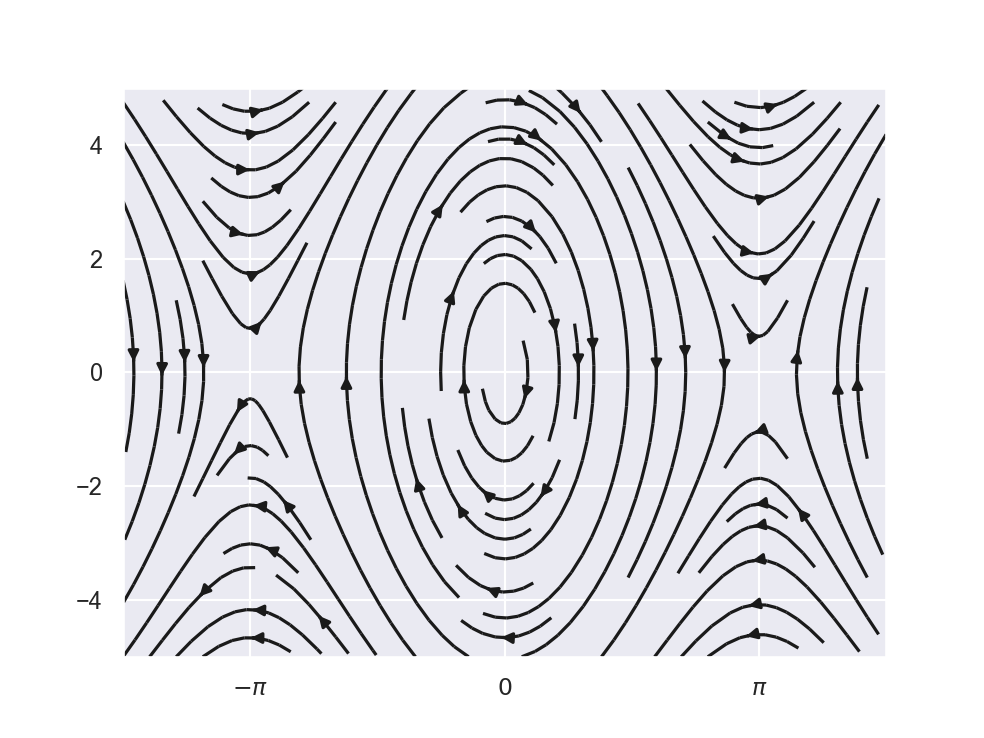

In [4]:
plt.figure()
theta = np.linspace(-1.5 * np.pi, 1.5 * np.pi, 100)
d_theta = np.linspace(-5.0, 5.0, 100)
plt.grid(True)
plt.xticks([-np.pi, 0, np.pi], [r"$-\pi$", "$0$", r"$\pi$"])
plt.streamplot(*Q(f, theta, d_theta), color="k") 

Un exemple de non-unicité des solutions
===================

Considérons le problème de Cauchy
$$
\dot{x} = \sqrt{|x|} \quad , \quad x(0)=0
$$
$x\mapsto \sqrt{|x|}$ est continue sur $\mathbb{R}$ donc il existe des solutions d'après le théorème de Peano. Par contre, elle n'est pas $C^1$ en 0 donc le théorème de Cauchy-Lipschitz ne s'applique pas. 

En fait, il y a une infinité de solutions partant de 0 car toutes les fonctions du type
$$
x(t) = 
\left\{
\begin{array}{ll}
-\frac{1}{4}(t-t^-)^2 & t\leq t^- \\
0 & t \in [t^-,t^+]\\
\frac{1}{4}(t-t^+)^2 & t\geq t^+
\end{array}
\right.
$$
avec $0\in [t^-,t^+]$ sont $C^1$ sur $\mathbb{R}$ et solution. En d'autres termes, la solution peut soit rester à 0, soit "décoler" à n'importe quels temps $t^+\geq 0$ et/ou $t^-\leq 0$. Une fois qu'elle a "décolé", $x(t)>0$ et $x\mapsto \sqrt{|x|}$ devient $C^1$ donc la solution est unique tant qu'elle reste strictement positive.

<IPython.core.display.Javascript object>


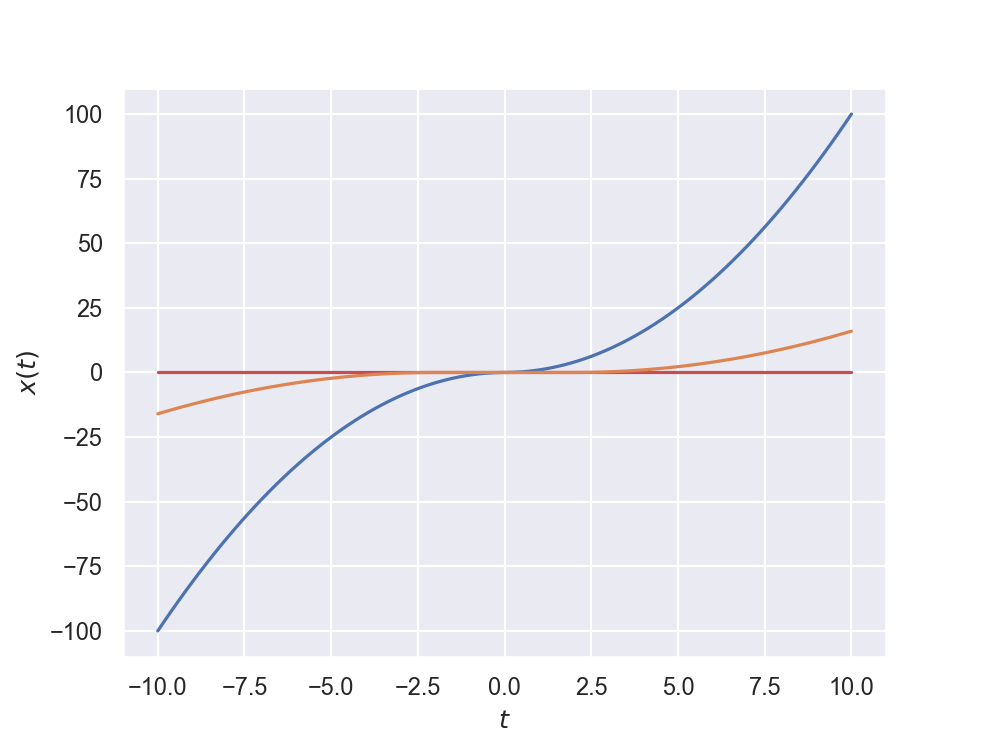

Text(0, 0.5, '$x(t)$')

In [5]:

plt.figure()
t = np.linspace(-10,10,100)
plt.plot(t,0*t,'r')
plt.grid(True)

plt.plot(t,np.sign(t)*t**2)

plt.plot(t, (t<-2)*(-(t+2)**2/4)+(t>2)*(t-2)**2/4 )

plt.xlabel('$t$')
plt.ylabel('$x(t)$')

Un exemple d'explosion en temps fini
=====================

Le problème de Cauchy 
$$
\dot{x} = x^2 \quad , \quad x(0)=x_0
$$
admet une unique solution maximale d'après le théorème de Cauchy-Lipschitz car $x\mapsto x^2$ est $C^1$. Cette solution est donnée par
$$
x(t) = \frac{x_0}{1-x_0t}
$$
définie maximalement sur l'intervalle ouvert $]-\infty , \frac{1}{x_0}[$. En effet, elle ne peut être prolongée au delà, elle diverge en temps fini.

<IPython.core.display.Javascript object>


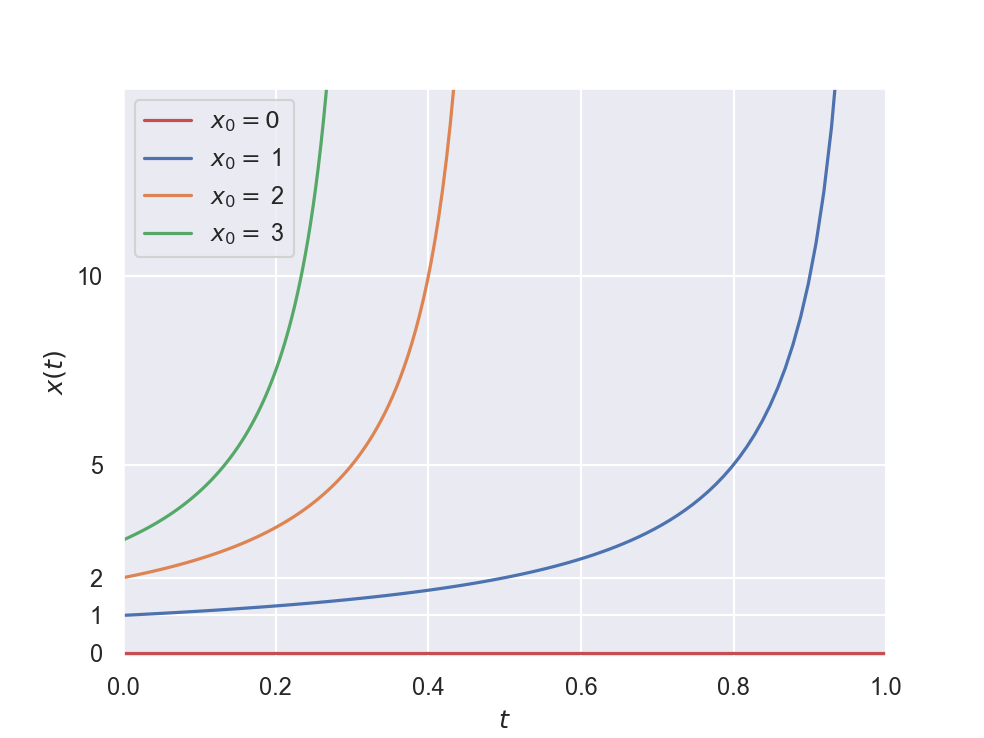

Text(0, 0.5, '$x(t)$')

In [6]:
def f(t,x0):
    return x0/(1-x0*t)

plt.figure()
t = np.linspace(0,1,10)
plt.plot(t,0*t,'r', label = "$x_0=0$")
plt.grid(True)

list_x0 = [1,2,3]
for x0 in list_x0:
    t = np.linspace(0,1/x0*0.999,100)
    plt.plot(t,f(t,x0), label = "$x_0=$ "+ str(x0))
plt.yticks([0.0, 1.0, 2.0, 5.0,10.0])
plt.axis([0,1,-0.1,15])
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$x(t)$')

Un exemple de système chaotique : l'attracteur de Lorenz
-----------------------

\begin{align*}
\dot{x}_1 &= \sigma (x_2-x_1) \\
\dot{x}_2 &= \rho \, x_1 - x_2 -x_1x_3 \\
\dot{x}_3 &= x_1x_2-\beta x_3 
\end{align*}

In [7]:
sigma = 10; rho = 28; beta = 8/3;

def fun(t, x):
    x1, x2, x3 = x
    return np.array([sigma*(x2-x1), rho*x1-x2-x1*x3, x1*x2-beta*x3])

options = {
    "max_step": 0.001, 
    "atol"    : 1e-11,        
    #"rtol"    : 1e-9,
    #"dense_output" : True
}

t_span = np.array([0.0, 60.0])
x0 = np.array([-10.0, -10.0 ,23.0])

result = solve_ivp(fun, t_span, x0,**options)

r_t = result["t"]
x_1 = result["y"][0]
x_2 = result["y"][1]
x_3 = result["y"][2]


<IPython.core.display.Javascript object>


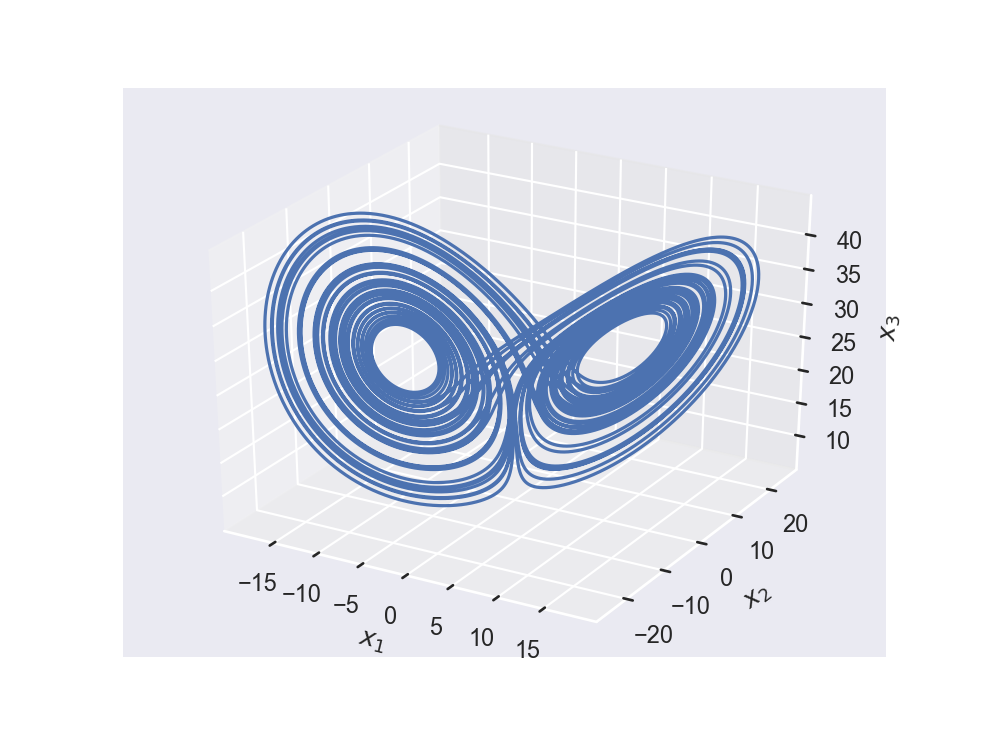

Text(0.5, 0, '$x_3$')

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x_1,x_2,x_3)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


Comparons maintenant deux trajectoires initialisées très proches.

<IPython.core.display.Javascript object>


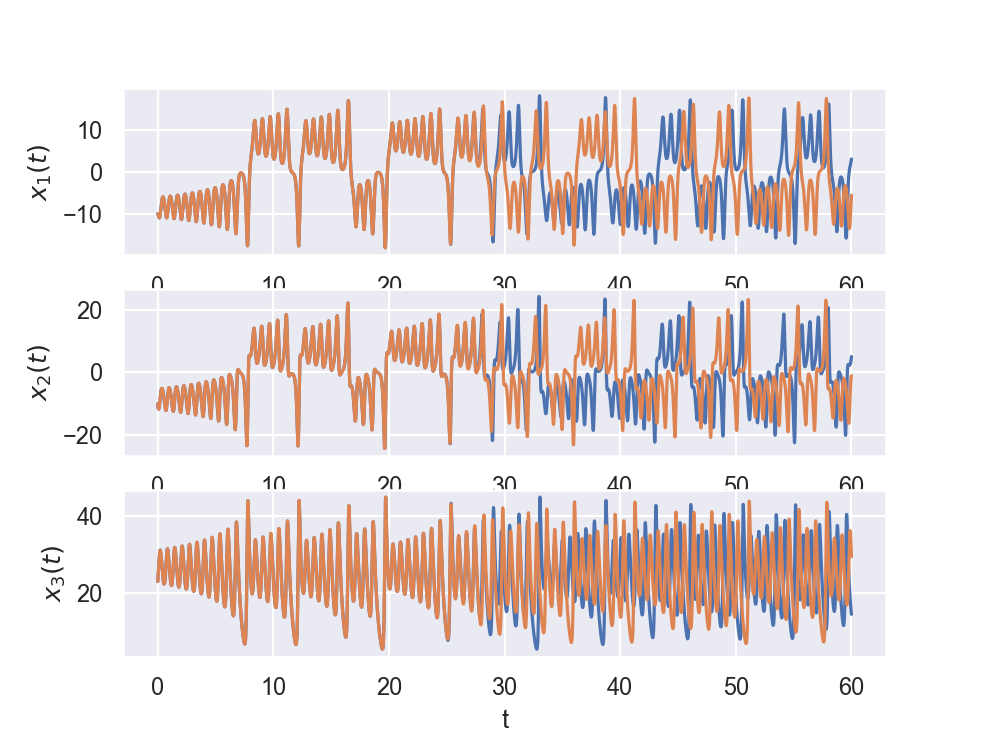

Text(0.5, 0, 't')

In [9]:
delta = 1e-9  # erreur initiale supérieure à la tolérance du schéma pour bien observer 
# la propagation de cette erreur là (et pas celle des erreurs numériques)
x0_delta = x0 + delta

result_delta = solve_ivp(fun, t_span, x0_delta,**options)

r_t_delta = result_delta["t"]
x_1_delta = result_delta["y"][0]
x_2_delta = result_delta["y"][1]
x_3_delta = result_delta["y"][2]

fig = plt.figure()
fig.add_subplot(3,1,1)
plt.grid(True)
plt.plot(r_t,x_1)
plt.plot(r_t_delta,x_1_delta)
plt.ylabel('$x_1(t)$')

fig.add_subplot(3,1,2)
plt.grid(True)
plt.plot(r_t,x_2)
plt.plot(r_t_delta,x_2_delta)
plt.ylabel('$x_2(t)$')

fig.add_subplot(3,1,3)
plt.grid(True)
plt.plot(r_t,x_3)
plt.plot(r_t_delta,x_3_delta)
plt.ylabel('$x_3(t)$')
plt.xlabel('t')

Si on commet une erreur $\delta= 10^{-9}$ sur la condition initiale,  on n'est déjà plus  sur la bonne "aile" du papillon après 30 unités de temps. En fait, la propagation de l'erreur est exponentielle autour du temps initial :
$$
|x_\delta(t)-x(t)| \approx e^{\lambda t} |\delta| \qquad \forall t\in [0,t^+]
$$
Nous pouvons l'observer ci-dessous.

<IPython.core.display.Javascript object>


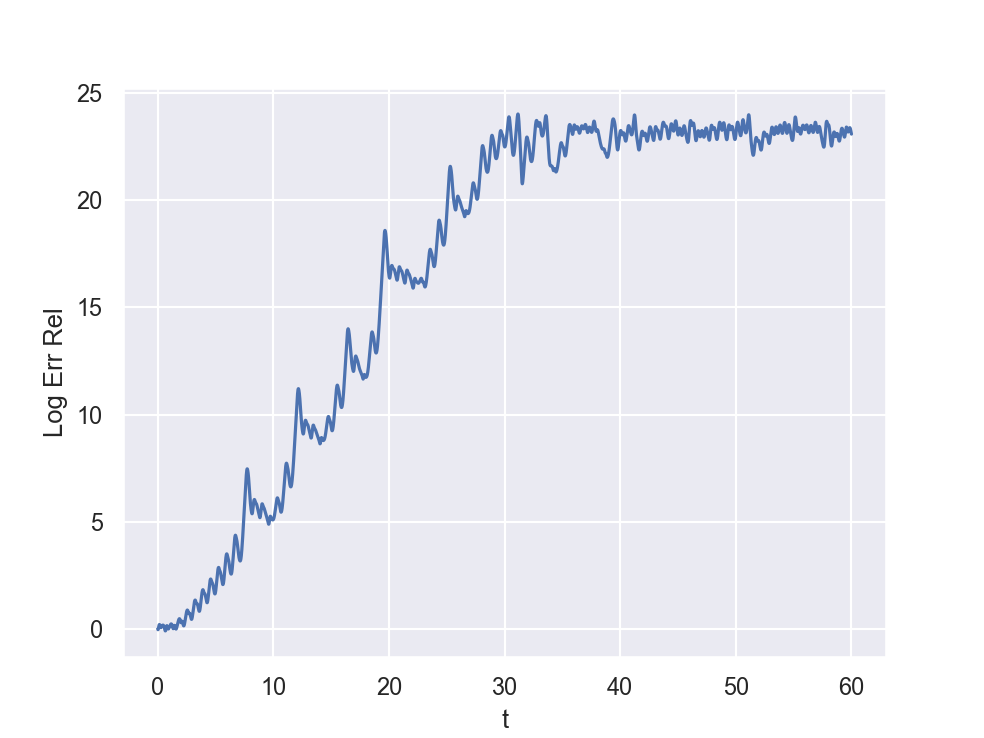

Text(0, 0.5, 'Log Err Rel')

In [10]:
# on commence par mettre les solutions sur le même temps
x_1_delta = np.interp(r_t,r_t_delta,x_1_delta)
x_2_delta = np.interp(r_t,r_t_delta,x_2_delta)
x_3_delta = np.interp(r_t,r_t_delta,x_3_delta)

# calcul de l'erreur relative par rapport à l'erreur initiale
erreur = np.sqrt((x_1-x_1_delta)**2+(x_2-x_2_delta)**2+(x_3-x_3_delta)**2) 
erreur_rel = erreur/erreur[0]

# logarithmic plot
plt.figure()
plt.grid(True)
plt.plot(r_t,np.log(erreur_rel))
plt.xlabel('t')
plt.ylabel('Log Err Rel')



On observe donc bien une croissance exponentielle de l'erreur. La pente de la droite représente l'exposant de Lyapunov $\lambda$ et nous dit que la trajectoire garde une erreur de l'ordre de l'erreur initiale seulement pour $t<<\frac{1}{\lambda}$. A noter que cette propagation exponentielle de l'erreur a lieu au niveau de l'"attracteur étrange" : les solutions ont une erreur stable tant qu'elles sont "loin" de l'attracteur (ici pour $t\in [0,1]$). 